In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [21]:
def get_normalized_data():
    print("Reading in and transforming data...")
    
    
    df = pd.read_csv('C:/Users/TANNERU/Downloads/train.csv/train.csv')
    #print(df)
    data = df.values.astype(np.float32)
    #print(data)
    
    np.random.shuffle(data)
    
    
    X = data[:,1:] #except 1 columns
    Y = data[:,0].astype(np.int32) #only 1st column
    print("Innputs",X)
    print("output",Y)
    print(X.shape) #(42000, 784)
    print(Y.shape) #(42000,)
    
    
    Xtrain = X[:-1000]
    Xtest = X[-1000:]
    Ytrain = Y[:-1000]
    Ytest = Y[-1000:]
    print("Xtrain",Xtrain.shape)#(41000, 784)
    print("Xtest",Xtest.shape)#(1000, 784)
    print("Ytrain",Ytrain.shape)#(41000,)
    print("Ytest",Ytest.shape) #(1000,)
    
    
    mu = Xtrain.mean(axis = 0) #(784,)
    std = Xtrain.std(axis = 0) 
    np.place(std,std == 0,1) # changes all values to 0,1
    print(np.place(std,std == 0,1))
    #print(mu)
    print(mu.shape)#(784,)
    
    
    #center the data
    Xtrain = (Xtrain - mu)/std
    Xtest = (Xtest - mu)/std
    print(Xtrain)
    print(Xtest)
    
    
    return Xtrain,Xtest,Ytrain,Ytest
    
    
    
    

In [22]:
get_normalized_data()

Reading in and transforming data...
Innputs [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
output [3 5 1 ... 0 8 2]
(42000, 784)
(42000,)
Xtrain (41000, 784)
Xtest (1000, 784)
Ytrain (41000,)
Ytest (1000,)
None
(784,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([3, 5, 1, ..., 7, 8, 6]),
 array([4, 9, 6, 9, 6, 5, 3, 7, 1, 7, 6, 1, 6, 9, 9, 2, 3, 5, 3, 0, 3, 9,
        7, 3, 6, 2, 8, 2, 8, 5, 6, 0, 7, 0, 4, 3, 8, 9, 9, 8, 2, 0, 7, 2,
        1, 2, 4, 9, 9, 0, 5, 6, 9, 6, 6, 8, 9, 7, 7, 0, 6, 7, 3, 2, 4, 6,
        9, 2, 3, 6, 8, 3, 4, 8, 3, 9, 6, 8, 7, 3, 6, 0, 7, 5, 0, 9, 1, 6,
        0, 8, 6, 0, 3, 5, 0, 3, 0, 6, 2, 7, 0, 4, 3, 3, 8, 7, 2, 2, 0, 4,
        4, 0, 9, 9, 4, 6, 2, 9, 7, 5, 4, 6, 0, 8, 8, 8, 1, 1, 3, 8, 2

In [23]:
def y2indicator(y):
    N = len(y)
    y = y.astype(np.int32)
    ind = np.zeros((N,10))
    for i in range(N):
        ind[i,y[i]] = 1
    return ind

def error_rate(p,t):
    return np.mean(p!=t)


In [24]:
def main():
    Xtrain, Xtest, Ytrain, Ytest = get_normalized_data()
    
    max_iter = 15
    print_period = 80
    
    
    lr  = 0.00004
    reg = 0.01
    
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)
    
    
    N,D = Xtrain.shape #(41000, 784)
    #print(N,D)
    batch_sz = 500
    n_batches = N // batch_sz #82
    
    #Hidden layers
    M1 = 300 #300 neurons
    M2 = 100 #100 neurons
    K = 10 # 10 classes
    
    #hidden layer 1
    W1_init = np.random.randn(D,M1)/ np.sqrt(D)
    b1_init = np.zeros(M1)
    #hidden layer 2
    W2_init = np.random.randn(M1,M2) / np.sqrt(M1)
    b2_init = np.zeros(M2)
    #output layer 
    W3_init = np.random.randn(M2,K) / np.sqrt(M2)
    b3_init = np.zeros(K)
    
    
    X = tf.placeholder(tf.float32,shape=(None,D),name = 'X') #inputs
    T = tf.placeholder(tf.float32,shape=(None,K),name = 'Y') #output
    
    W1 = tf.Variable(W1_init.astype(np.float32))
    b1 = tf.Variable(b1_init.astype(np.float32))
    W2 = tf.Variable(W2_init.astype(np.float32))
    b2 = tf.Variable(b2_init.astype(np.float32))
    W3 = tf.Variable(W3_init.astype(np.float32))
    b3 = tf.Variable(b3_init.astype(np.float32))
    
    
    #model 
    Z1 = tf.nn.relu(tf.matmul(X,W1)+b1) #hidden layer 1
    Z2 = tf.nn.relu(tf.matmul(Z1,W2)+b2) #hidden layer 2
    
    Yish = tf.matmul(Z2,W3)+b3 #output
    
    
    #cost function
    cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(logits = Yish,labels = T))
    
    
    #optimizer RMSprop with momentum
    train_op = tf.train.RMSPropOptimizer(lr,decay = 0.99,momentum = 0.9).minimize(cost)
    
    #predict
    predict_op = tf.argmax(Yish,1)
    
    costs = []
    #initializing variable values
    init = tf.global_variables_initializer()
    
    #creating session
    with tf.Session() as session:
        session.run(init)
        for i in range(max_iter):
            for j in range(n_batches):
                Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
                Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
                
                session.run(train_op,feed_dict = {X:Xbatch,T:Ybatch})
                
                if j % print_period == 0:
                    test_cost = session.run(cost,feed_dict = {X:Xtest,T:Ytest_ind})
                    prediction= session.run(predict_op,feed_dict = {X:Xtest})
                    err = error_rate(prediction,Ytest)
                    print("i",i,"j",j,"test_cost,",test_cost,"error",err)
                    costs.append(test_cost)
    
    plt.plot(costs)
    plt.show()
                    

    
    

    
    

Reading in and transforming data...
Innputs [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
output [9 7 6 ... 8 3 5]
(42000, 784)
(42000,)
Xtrain (41000, 784)
Xtest (1000, 784)
Ytrain (41000,)
Ytest (1000,)
None
(784,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
i 0 j 0 test_cost, 2376.7817 error 0.884
i 0 j 80 test_cost, 258.39957 error 0.077
i 1 j 0 test_cost, 252.92471 error 0.075
i 1 j 80 test_cost, 176.93161 error 0.049
i 2 j 0 test_cost, 175.233 error 0.047
i 2 j 80 test_cost, 141.78346 error 0.035
i 3 j 0 test_cost, 141.17712 error 0.035
i 3 j 80 test_cost, 124.5321 error 0.037
i 4 j 0 test_cost, 124.10274 err

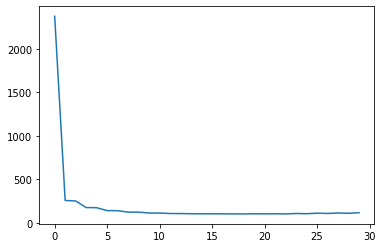

In [25]:
main()